# Telco Customer Churn - EDA & Preprocessing

This notebook performs exploratory data analysis and data preprocessing on the Telco Customer Churn dataset, preparing it for machine learning models.

## Step 1: Import Libraries

Import required packages for data manipulation, visualization, and machine learning preprocessing.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

## Step 2: Load and Clean Data

Load the Telco Customer Churn dataset and perform initial data cleaning:
- Handle missing values
- Remove irrelevant columns (customerID)
- Convert target variable to binary

In [2]:
# Download dataset (or use Kaggle API if downloaded)
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)

# Handle missing, outliers
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)  # Drop ~11 missing
df.drop('customerID', axis=1, inplace=True)  # Irrelevant
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})  # Binary target

print(f"Dataset shape: {df.shape}")
print(f"Churn distribution:\n{df['Churn'].value_counts()}")

Dataset shape: (7032, 20)
Churn distribution:
Churn
0    5163
1    1869
Name: count, dtype: int64


## Step 3: Exploratory Data Analysis

Visualize key insights about customer churn, particularly across different contract types:
- Churn rates by contract type
- Insight: Month-to-month contracts show higher churn

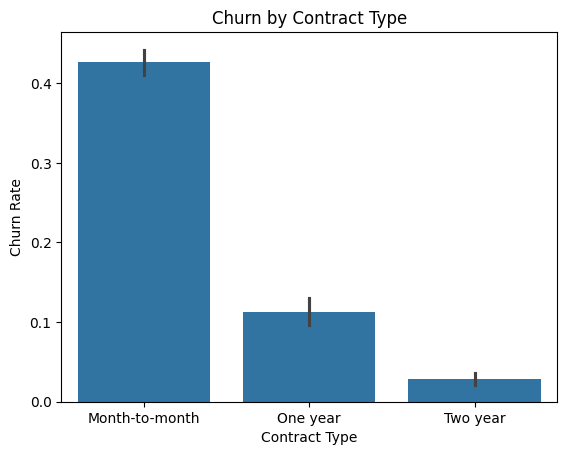

In [3]:
sns.barplot(x='Contract', y='Churn', data=df)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.show()  # Insight: Month-to-month higher churn

## Step 4: Feature Engineering & Data Preparation

Prepare features for modeling:
- Identify categorical and numerical columns
- Split data into training and testing sets
- Apply one-hot encoding to categorical variables
- Prepare preprocessed data for model training

In [4]:
# Identify column types
cat_cols = df.select_dtypes('object').columns.tolist()
num_cols = [col for col in df.columns if col not in cat_cols and col != 'Churn']

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Categorical columns: {cat_cols}")
print(f"Numerical columns: {num_cols}")

Training set size: 4922
Testing set size: 2110
Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


## Step 5: Feature Preprocessing

Create a preprocessing pipeline:
- Apply one-hot encoding to categorical features (drop first to avoid multicollinearity)
- Pass numerical features through unchanged
- Transform both training and testing sets

In [5]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
    ('num', 'passthrough', num_cols)
])

# Fit and transform training data
X_train_prep = preprocessor.fit_transform(X_train)

# Transform test data
X_test_prep = preprocessor.transform(X_test)

print(f"Preprocessed training data shape: {X_train_prep.shape}")
print(f"Preprocessed testing data shape: {X_test_prep.shape}")
print("Data preprocessing complete!")

Preprocessed training data shape: (4922, 30)
Preprocessed testing data shape: (2110, 30)
Data preprocessing complete!
